In [1]:
#Compute theoretical variance (Gaussian approx.) for power spectrum multipoles
#-> via thin-shell approximation

In [2]:
import numpy as np
from math import floor
from scipy.interpolate import make_interp_spline
from matplotlib import pyplot as plt

twopi3 = (2*np.pi)**3

import time as time

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Verdana']

In [4]:
#specs

Lbox = 1500
kf = 2*np.pi/Lbox

#dk, cf, Nb are size of the bin, center of the first mode, and number of the bins respectively. 
#See also definition of kh_data

dk, cf, Nb = 1, 1, 128
#dk, cf, Nb = 2, 1.5, 64

kh_data = np.array([i*dk + cf for i in range(Nb)])*kf

print(kf, Lbox)
print(kh_data/kf)

0.0041887902047863905 1500
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128.]


In [5]:
#upload power spectrum multipoles

fname_pell = '../P_ell.txt'

k_th, p0_th, p2_th, p4_th = np.loadtxt(fname_pell, unpack=True)

In [6]:
#interpolate p_ell

p0_func = make_interp_spline(k_th, p0_th)
p2_func = make_interp_spline(k_th, p2_th)
p4_func = make_interp_spline(k_th, p4_th)

In [7]:
#compute the Gaussian variance

Nk = 4*np.pi/(3*(kf)**3)*((kh_data+dk*kf/2)**3-(kh_data-dk*kf/2)**3)

P0, P2, P4 = p0_func(kh_data), p2_func(kh_data), p4_func(kh_data)

C00 = 2/Nk*(P0**2 + 1/5*P2**2 + 1/9*P4**2)
C02 = 1/Nk*(4*P0*P2 + 4/7*P2**2 + 8/7*P2*P4 + 200/693*P4**2)
C04 = 1/Nk*(4*P0*P4 + 36/35*P2**2 + 80/77*P2*P4 + 324/1001*P4**2)
C22 = 10/Nk*(P0**2 + 4/7*P0*(P2+P4) + 3/7*P2**2 + 24/77*P2*P4 + 1789/9009*P4**2)
C44 = 162/Nk*(1/9*P0**2 + 40/693*P0*P2 + 36/1001*P0*P4 + 1789/45045*P2**2 + 40/1001*P2*P4 + 529/17017*P4**2)
C24 = 1/Nk*(72/7*P0*P2 + 400/77*P0*P4 + 216/77*P2**2 + 2*3578/1001*P2*P4 + 1800/1001*P4**2)

In [8]:
print((Nk).astype(int))
print(len(Nk))

[    13     51    114    202    315    453    616    805   1018   1257
   1521   1810   2124   2464   2828   3218   3632   4072   4537   5027
   5542   6083   6648   7239   7855   8495   9161   9853  10569  11310
  12077  12869  13685  14527  15394  16287  17204  18146  19114  20107
  21125  22168  23236  24329  25447  26591  27760  28953  30172  31416
  32686  33980  35299  36644  38014  39409  40829  42274  43744  45239
  46760  48306  49876  51472  53093  54740  56411  58107  59829  61576
  63348  65145  66967  68814  70686  72584  74507  76454  78427  80425
  82449  84497  86570  88669  90793  92941  95115  97315  99539 101788
 104063 106362 108687 111037 113412 115812 118238 120688 123164 125664
 128190 130741 133317 135918 138545 141196 143873 146575 149302 152054
 154831 157633 160461 163313 166191 169094 172022 174975 177953 180956
 183985 187038 190117 193221 196350 199504 202684 205888]
128


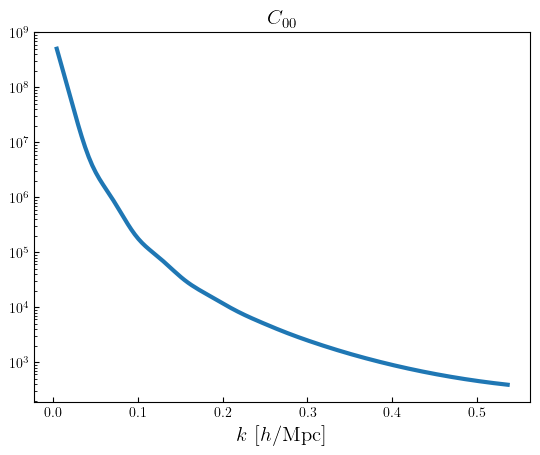

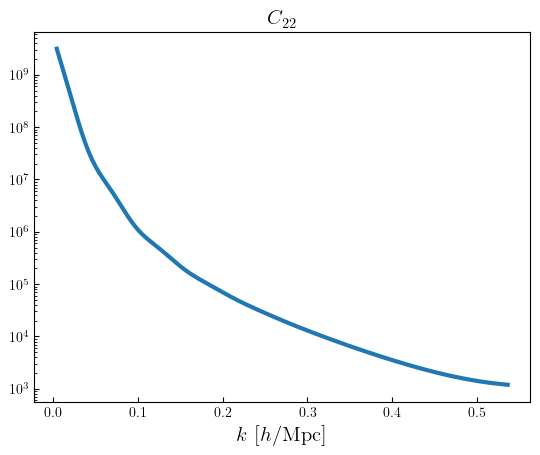

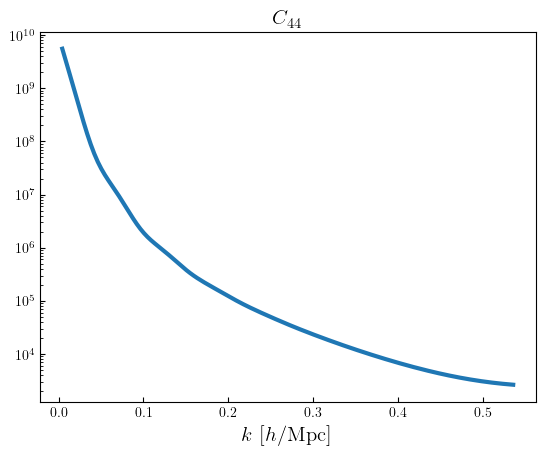

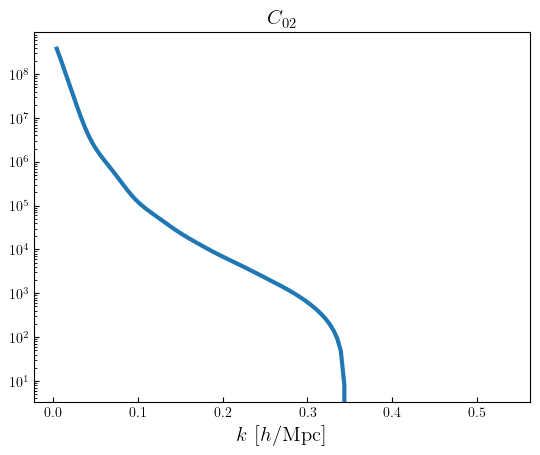

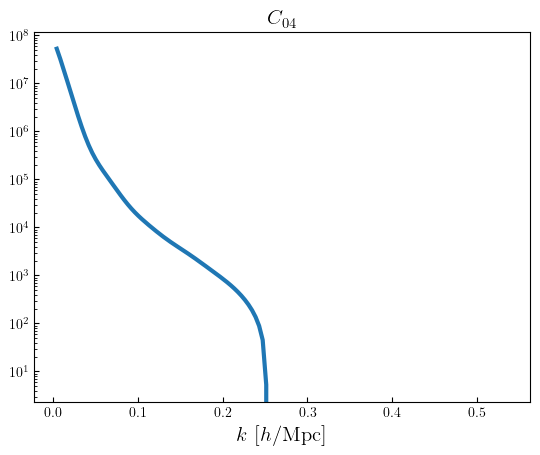

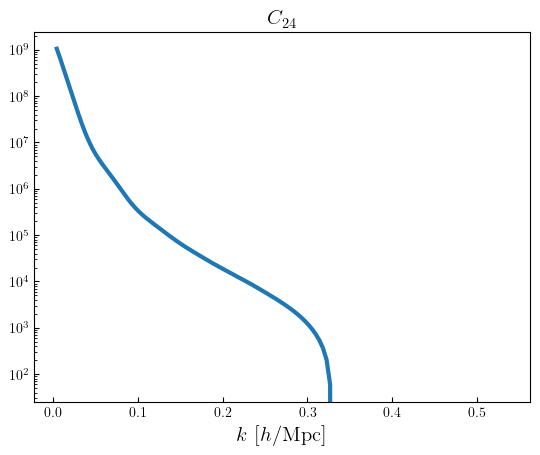

In [9]:
ftsize = 15

plt.plot(kh_data, C00, lw = 3)
plt.yscale('log')
plt.title('$C_{00}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C22, lw = 3)
plt.yscale('log')
plt.title('$C_{22}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C44, lw = 3)
plt.yscale('log')
plt.title('$C_{44}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C02, lw = 3)
plt.yscale('log')
plt.title('$C_{02}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C04, lw = 3)
plt.yscale('log')
plt.title('$C_{04}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C24, lw = 3)
plt.yscale('log')
plt.title('$C_{24}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

In [10]:
#save file

C = np.vstack([C00, C02, C04, C22, C24, C44])
print(np.shape(C))

fname =  'CovP_Gauss_NotBinned.dat'
print(fname)

np.savetxt(fname, np.transpose(C), header="C00, C02, C04, C22, C24, C44")

(6, 128)
CovP_Gauss_NotBinned.dat
